# Tarea 3
## Punto 1


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import requests
import random
import sympy as sp
import re
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_excel("../data/Punto1.xlsx")
df

,Ingresos,Estrato,Credito
0,1,2,0
1,5,2,0
2,1,4,1
3,6,0,0
4,8,5,1
5,4,0,0
6,3,5,1
7,6,2,0
8,3,5,1
9,3,2,0


![Dataset punto 1 hoja 2 arbol a mano](../data/img/Punto1.PNG)

De aqui podemos ver que la ganancia de Estrato es mayor por tanto sera nuestro primer clasificador, luego vendria la variable ingresos.

In [3]:
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(df[["Estrato","Ingresos"]], df["Credito"])

DecisionTreeClassifier(criterion='entropy', random_state=0)

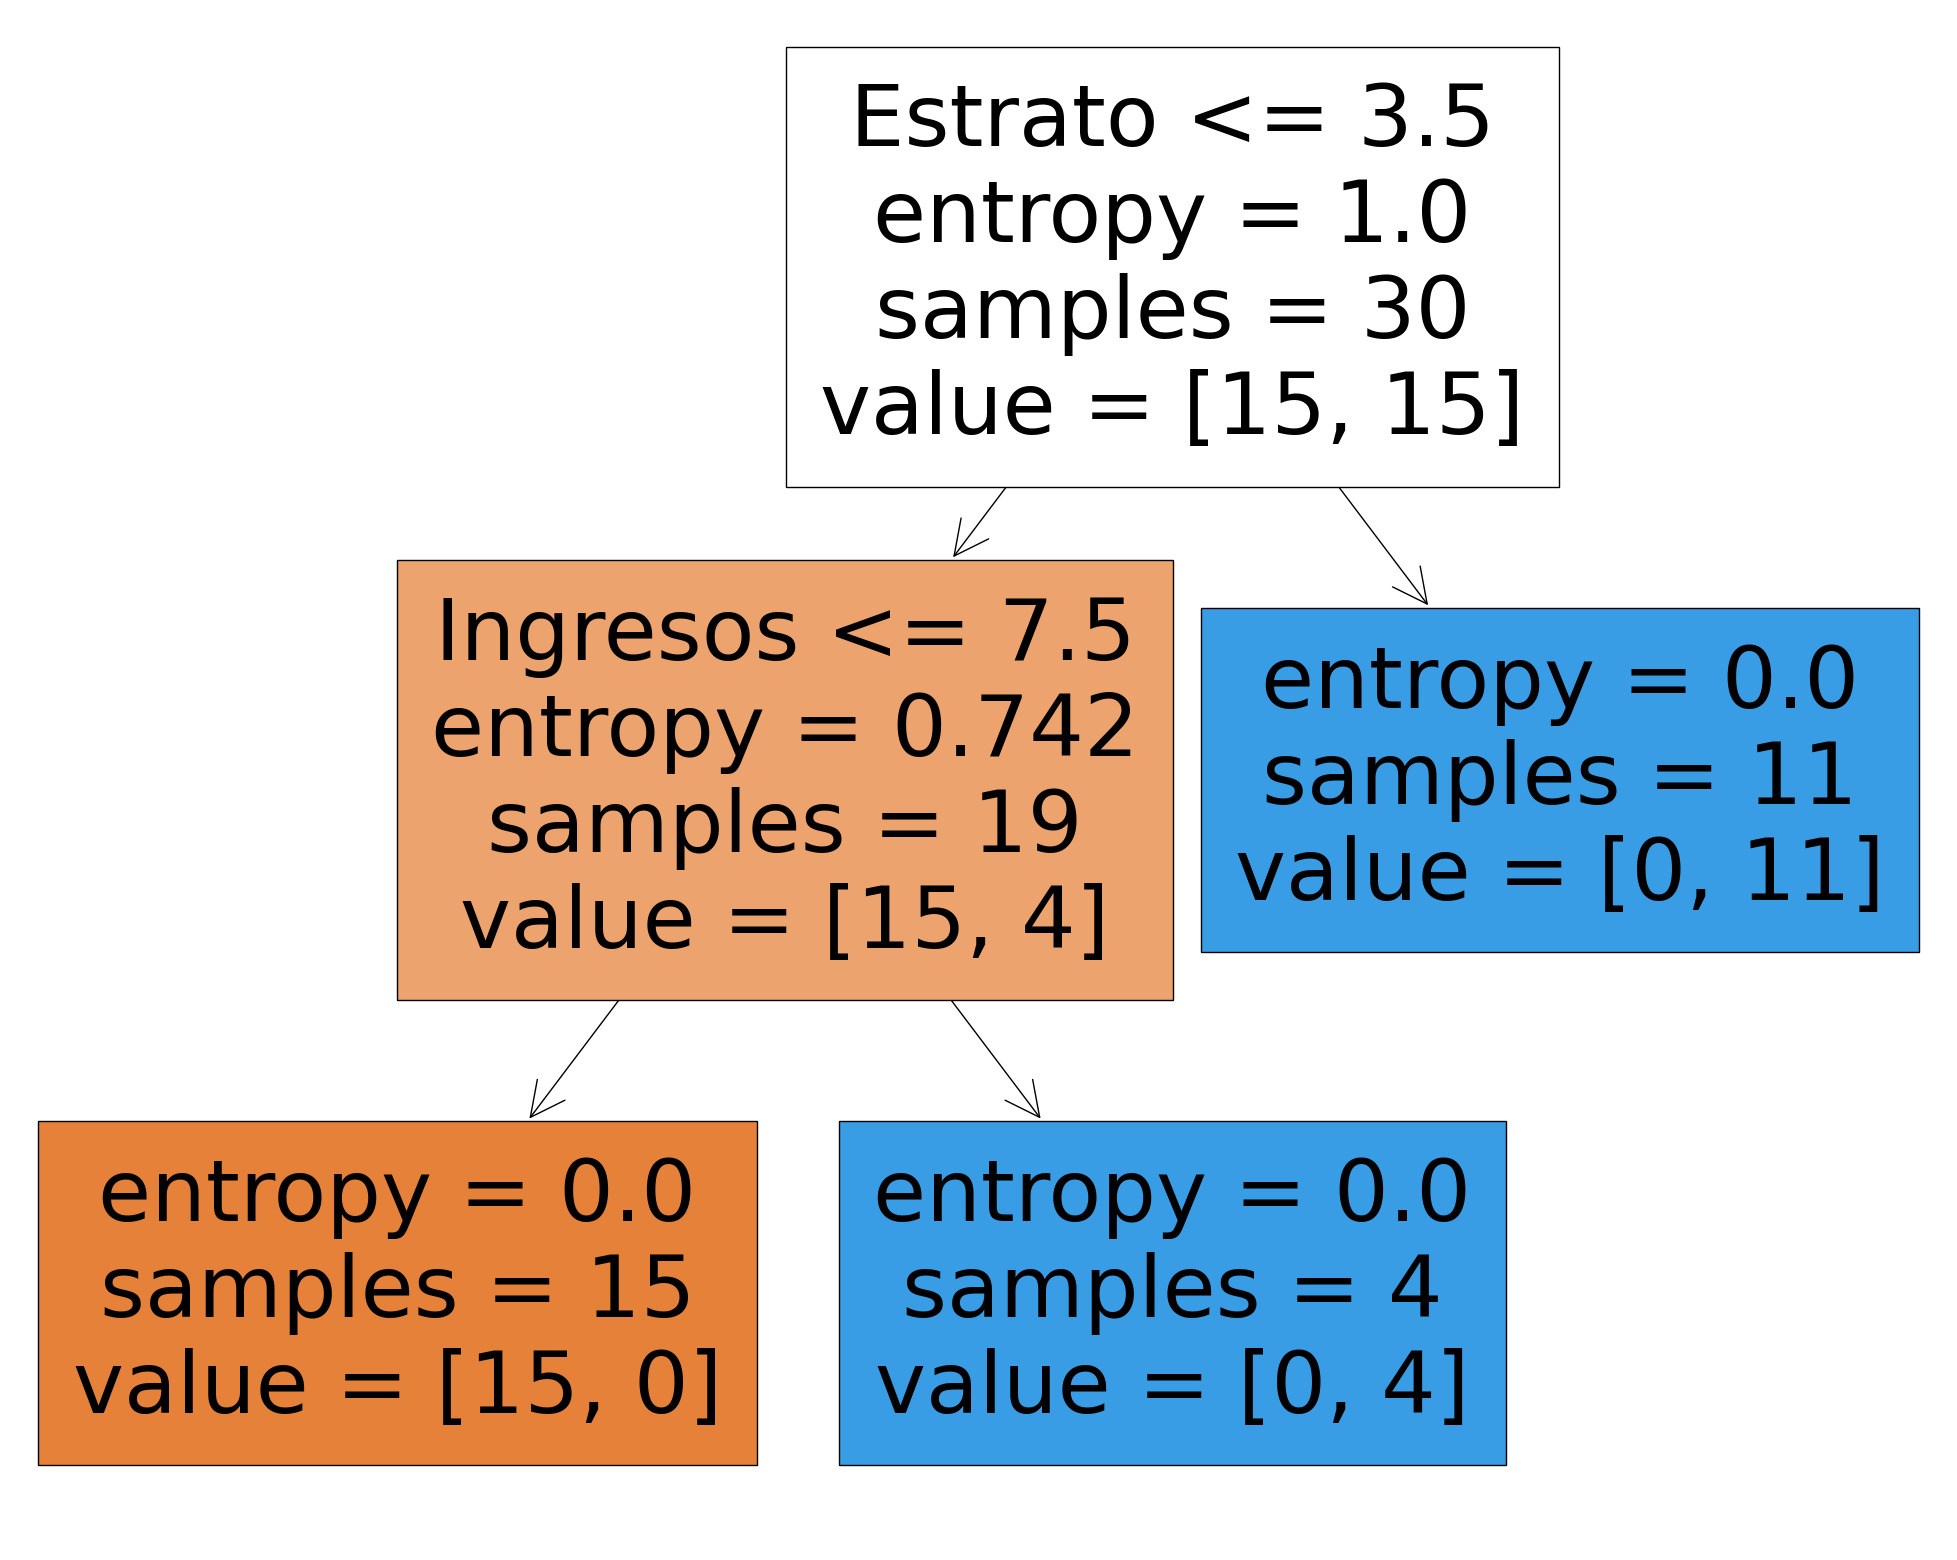

In [4]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                    feature_names=['Estrato','Ingresos'],
                    filled=True)

# Punto 2

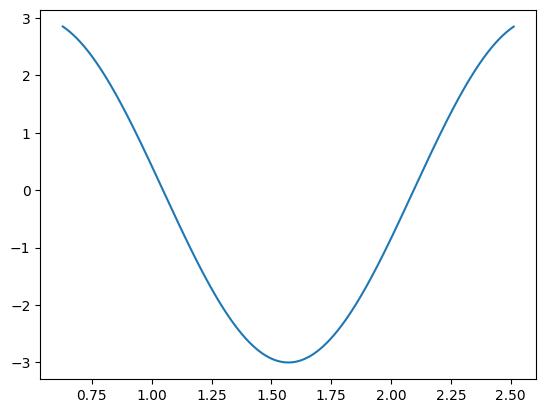

In [5]:
df_senal = pd.read_csv('../data/senal.csv')
plt.plot(df_senal['x'],df_senal['y'])
x = df_senal['x']
y = df_senal['y']

In [6]:
def y_predict(a, b, c, d, x):
    return a*math.sin(b*x+c)+d

def gradient_descent(x, y, epochs):
    lr = 0.01
    n = len(x)
    batch = 500
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0

    for i in range(epochs):
        a_gradient = 0
        b_gradient = 0
        c_gradient = 0
        d_gradient = 0
        e = 0
        
        for m in range(batch):
            ix = int(random.uniform(0, n))
            error = y[ix] - y_predict(a, b, c, d, x[ix])
            
            a_gradient += -2 * math.sin(b * x[ix] + c) * error
            b_gradient += -2 * x[ix] * math.cos(b * x[ix] + c) * error
            c_gradient += -2 * math.cos(b * x[ix] + c) * error
            d_gradient += -2 * error
        
            e += error ** 2

        a -= lr * a_gradient / batch
        b -= lr * b_gradient / batch
        c -= lr * c_gradient / batch
        d -= lr * d_gradient / batch
        e /= batch

        rsl.append([a, b, c, d, e])
        print(f"error:{e} period:{b} amplitude:{a} constants:{c}\n")

    return rsl, a, b, c

error:4.208545023568597 period:0.7866777521312848 amplitude:0.18356122835092925 constants:0.20687050361493015

error:4.021647257570728 period:0.7783713541206982 amplitude:0.17341488432133326 constants:0.20505056433301655

error:4.331725557666602 period:0.769624721105257 amplitude:0.16147357767058867 constants:0.20297625026585026

error:4.242126413338465 period:0.7619440039675494 amplitude:0.15121180862735487 constants:0.20183060442172485

error:4.069900164770388 period:0.7523597144839842 amplitude:0.13953693788784943 constants:0.19863184690412944

error:3.9768539929302236 period:0.7432826474454661 amplitude:0.13186372161723078 constants:0.19645136875041677

error:4.039559242941641 period:0.7344486263460795 amplitude:0.12360697907534733 constants:0.19443798360126716

error:3.6737129588488973 period:0.7276291216428622 amplitude:0.11537584279188931 constants:0.19336945136202063

error:4.208250563490589 period:0.718513310288515 amplitude:0.10802286640033665 constants:0.19140048061637285

e

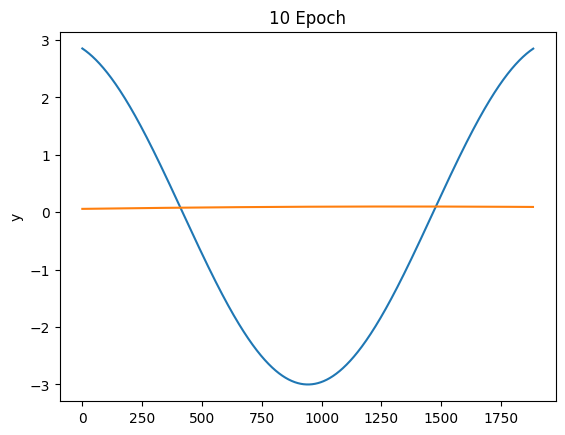

In [7]:
result1,a1,b1,c1 = gradient_descent(x,y,epochs=10)
plt.title("10 Epoch")
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a1,b1,c1,0,xi)for xi in x[:ix]])

plt.show()

error:4.551407377633439 period:0.22255272413047777 amplitude:0.7763779455467672 constants:0.3122645348219669

error:4.635000082382684 period:0.20062331002976944 amplitude:0.7659916359672962 constants:0.29937284767355493

error:4.728943867996748 period:0.1774446448344743 amplitude:0.755976336413473 constants:0.2855144735695036

error:4.131692030803435 period:0.15825260825997325 amplitude:0.7485178811099767 constants:0.27389771019045855

error:4.477273142675225 period:0.14123703717685487 amplitude:0.7424448451889766 constants:0.263260510489881

error:4.353137144577234 period:0.1170985259424877 amplitude:0.7347662716211507 constants:0.2493728837762946

error:4.0782761210623395 period:0.10681785028811748 amplitude:0.7318996618478043 constants:0.24326579796456038

error:4.1824781203879375 period:0.09073775302100566 amplitude:0.7274779119436233 constants:0.23304147428673877

error:3.9476520379349327 period:0.07852494590982777 amplitude:0.7244289853522123 constants:0.22522800944227314

error:

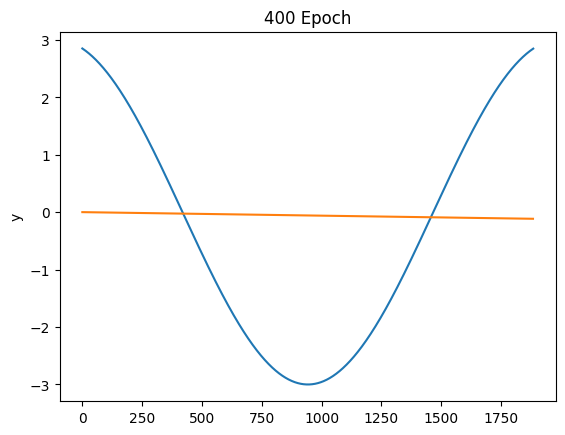

In [8]:
result2,a2,b2,c2 = gradient_descent(x,y,epochs=400)
plt.title("400 Epoch")
plt.ylabel("y")
plt.plot(y)
ix2 = -1
plt.plot([y_predict(a2,b2,c2,0,xi2)for xi2 in x[:ix2]])

plt.show()

error:4.460630637860382 period:0.023496998987368376 amplitude:0.5430216665341517 constants:0.6576825938914261

error:4.367136959435099 period:0.007029274543023361 amplitude:0.5344218842254929 constants:0.6473679655529148

error:4.457128069453374 period:-0.010802062962275927 amplitude:0.5251623876500905 constants:0.6353831623434976

error:4.3054087076026875 period:-0.027759128731873226 amplitude:0.5176023423544074 constants:0.6247511891594403

error:4.176306075132447 period:-0.03818899754866499 amplitude:0.5127983650741904 constants:0.6174890181248007

error:4.026788827760829 period:-0.051265465911800145 amplitude:0.5076364255829767 constants:0.6091938420566494

error:4.231592039924216 period:-0.06492979027564814 amplitude:0.5024367834931172 constants:0.6003052024267834

error:4.231119275849107 period:-0.07697968476949701 amplitude:0.49805179788335113 constants:0.5922921896585381

error:3.9611891208168313 period:-0.08864411214679059 amplitude:0.4937962110606188 constants:0.5841198139423

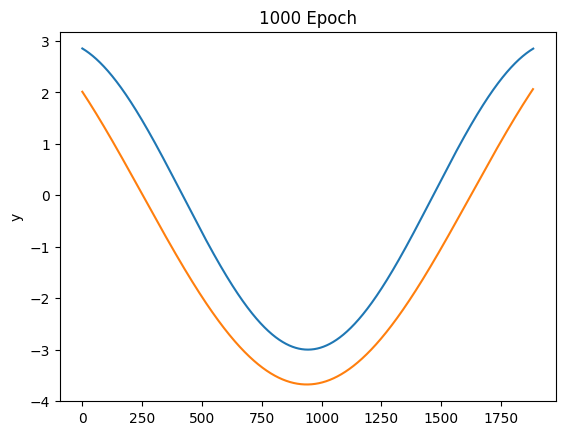

In [9]:
result3,a3,b3,c3 = gradient_descent(x,y,epochs=1000)
plt.title("1000 Epoch")
plt.ylabel("y")
plt.plot(y)
ix3 = -1
plt.plot([y_predict(a3,b3,c3,0,xi3)for xi3 in x[:ix3]])
plt.show()

error:4.138463358978426 period:0.6620882627774421 amplitude:0.028572321241394617 constants:1.0035854361261745

error:4.063243268079232 period:0.6652866351602419 amplitude:0.01966781615544863 constants:1.0083025035465827

error:3.93664781272033 period:0.6671671364436919 amplitude:0.01245435509824093 constants:1.0123342701246931

error:3.6792522811542776 period:0.6697044071262029 amplitude:0.005723159838408434 constants:1.016426650793991

error:3.9775811276843758 period:0.6710220931945184 amplitude:-0.0022060297183652553 constants:1.0202523040568727

error:3.885974233237793 period:0.6709195582650155 amplitude:-0.008584992564983084 constants:1.023316201975781

error:4.163764293796859 period:0.6739584602318117 amplitude:-0.018786027695621217 constants:1.0282246408809943

error:4.020074191624439 period:0.6719529689350306 amplitude:-0.022530572084869086 constants:1.0304374654406894

error:3.9808429724438117 period:0.6721704303738697 amplitude:-0.02834354415714082 constants:1.033696356276624


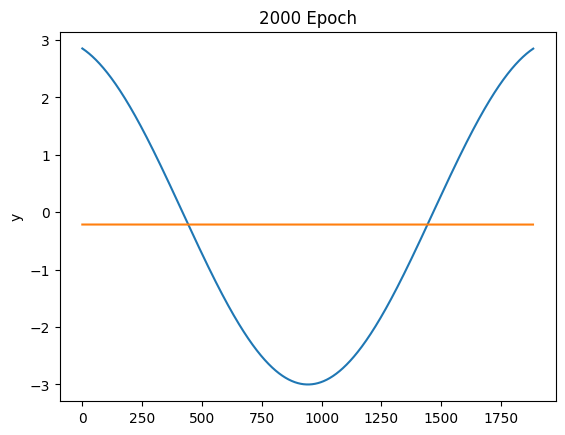

In [10]:
result4,a4,b4,c4 = gradient_descent(x,y,epochs=2000)
plt.title("2000 Epoch")
plt.ylabel("y")
plt.plot(y)
ix = -1
plt.plot([y_predict(a4,b4,c4,0,xi)for xi in x[:ix]])
plt.show()

# Punto 3

In [11]:

path = "https://www.datos.gov.co/resource/v98q-23dp.json?$query=SELECT%0A%20%20%60titulo%60%2C%0A%20%20%60descripcion%60%2C%0A%20%20%60url_lista_de_reproduccion%60%2C%0A%20%20%60plataforma%60"
reponse= requests.get(path)
df_path = pd.DataFrame(reponse.json())
df_path

,titulo,descripcion,url_lista_de_reproduccion,plataforma
0,Urbílogo - Bogotá dominguera,Entretenimiento,https://www.youtube.com/watch?v=2SNMqfo8COo,Señal Colombia
1,Historias en bici - Sibaté pedalea su pasado,Deportes,https://www.youtube.com/watch?v=ooEcRqrIyF8,Señal Deportes
2,Today in replay 18 de febrero,Deportes,https://www.youtube.com/watch?v=jzNsXnuQpDU,Señal Deportes
3,"Documentales: 'Camilo, el cura guerrillero' - ...",Película y Animación,https://www.youtube.com/watch?v=2vFrMJlP9OY,Señal Colombia
4,En cine nos vemos - Cuchillo de palo - Renate ...,Película y Animación,https://www.youtube.com/watch?v=VCtHtjphNOY,Señal Colombia
...,...,...,...,...
995,Para ver TV - Deporte,Entretenimiento,https://www.youtube.com/watch?v=yRW4EdsB8F0,Señal Colombia
996,Franja Retro - NN,Deportes,https://www.youtube.com/watch?v=I_0avV2Ql2o,Señal Colombia
997,Todo lo que vemos - 118 - Televidentes - Frank...,Educación,https://www.youtube.com/watch?v=k8aG5jcPp7w,Señal Colombia
998,sillón justicia música e identidad,Entretenimiento,https://www.youtube.com/watch?v=J0RMXGpu_BU,Señal Colombia


In [12]:
titles = df_path['titulo'].tolist()
dictionary  = defaultdict(int)

for title in titles:
    title = title.lower()
    title = re.sub('[áéíóú]', 'a', title)
    title = re.sub('[ñ]','n',title)
    words = title.split()
    for word in words:
        dictionary[word] += 1

single_Words= len(dictionary)
total_Words = sum(dictionary.values())
print("palagras unicas: ",single_Words)
print("total de palabras: ",total_Words)

palagras unicas:  2305
total de palabras:  8758


In [13]:
matrix = np.zeros((len(titles), single_Words))
sorted_words = sorted(dictionary.keys())
for i, title in enumerate(titles):
    title = title.lower()
    title = re.sub('[áéíóú]', 'a', title)
    title = re.sub('[ñ]','n', title)
    words = title.split()
    for j, word in enumerate(sorted_words):
        if word in words:
            matrix[i, j] = 1

print("Matriz de verificación de palabras:\n",matrix)

Matriz de verificación de palabras:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


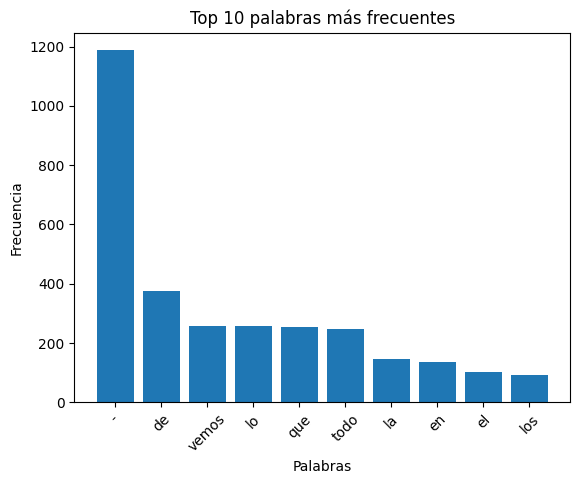

In [14]:
top_words = sorted(dictionary, key=dictionary.get, reverse=True)[:10]
word_counts = [dictionary[word] for word in top_words]
plt.bar(range(len(top_words)), word_counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 palabras más frecuentes')
plt.xticks(range(len(top_words)), top_words, rotation=45)
plt.show()

In [15]:
dummy_variables = pd.get_dummies(df_path["descripcion"],dummy_na=False,drop_first=True)
df_for_corr =  pd.concat([df_path, dummy_variables], axis=1)
corr = df_for_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\jmora\AppData\Local\Temp\ipykernel_19264\3582139142.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_for_corr.corr()


,Comedia,Deportes,Educación,Entretenimiento,Gente y Blogs,Mascotas y Animales,Música,Noticias y Política,Película y Animación,Sin fines de lucro y Activismo,Viajes y Eventos
Comedia,1.000000,-0.017584,-0.012818,-0.019681,-0.008478,-0.001001,-0.006542,-0.001001,-0.016656,-0.001001,-0.003487
Deportes,-0.017584,1.000000,-0.225176,-0.345735,-0.148938,-0.017584,-0.114919,-0.017584,-0.292589,-0.017584,-0.061252
Educación,-0.012818,-0.225176,1.000000,-0.252027,-0.108570,-0.012818,-0.083771,-0.012818,-0.213286,-0.012818,-0.044650
Entretenimiento,-0.019681,-0.345735,-0.252027,1.000000,-0.166698,-0.019681,-0.128623,-0.019681,-0.327479,-0.019681,-0.068556
Gente y Blogs,-0.008478,-0.148938,-0.108570,-0.166698,1.000000,-0.008478,-0.055409,-0.008478,-0.141074,-0.008478,-0.029533
Mascotas y Animales,-0.001001,-0.017584,-0.012818,-0.019681,-0.008478,1.000000,-0.006542,-0.001001,-0.016656,-0.001001,-0.003487
Música,-0.006542,-0.114919,-0.083771,-0.128623,-0.055409,-0.006542,1.000000,-0.006542,-0.108851,-0.006542,-0.022787
Noticias y Política,-0.001001,-0.017584,-0.012818,-0.019681,-0.008478,-0.001001,-0.006542,1.000000,-0.016656,-0.001001,-0.003487
Película y Animación,-0.016656,-0.292589,-0.213286,-0.327479,-0.141074,-0.016656,-0.108851,-0.016656,1.000000,-0.016656,-0.058018
Sin fines de lucro y Activismo,-0.001001,-0.017584,-0.012818,-0.019681,-0.008478,-0.001001,-0.006542,-0.001001,-0.016656,1.000000,-0.003487


In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

matrix_tf = np.copy(matrix)

for i in range(len(titles)):
    title = titles[i]
    words = title.lower().split()
    
    words = [word for word in words if word not in stop_words]
    total_words = len(words)
    for j in range(len(sorted_words)):
        word = sorted_words[j]
        frequency = words.count(word)
        matrix_tf[i, j] = frequency / total_words
matrix_tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
df_words = pd.DataFrame({'Palabra': list(dictionary.keys()),
                          'Frecuencia': list(dictionary.values())})
df_words = df_words.sort_values('Frecuencia', ascending=False)
vector = df_words['Frecuencia'].values
print("Vector de frecuencias:\n",vector)


Vector de frecuencias:
 [1187  377  259 ...    1    1    1]


In [18]:
vector_IDF = np.log(len(titles) / (df_words['Frecuencia'].values + 1))
print("Vector de frecuencias transformadas:\n",vector_IDF)

Vector de frecuencias transformadas:
 [-0.17227122  0.97286108  1.34707365 ...  6.2146081   6.2146081
  6.2146081 ]


In [19]:
matrix_multiply = matrix_tf*np.transpose(vector_IDF)
print("Matriz de multiplicación:\n",matrix_multiply)

Matriz de multiplicación:
 [[-0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 ...
 [-0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]
 [-0.  0.  0. ...  0.  0.  0.]]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(matrix_multiply,
                                                     [str(a) for a in range(len(matrix_multiply))], 
                                                     test_size=0.2, 
                                                     random_state=42)
X_train

array([[-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0.,  0.,  0., ...,  0.,  0.,  0.]])

In [21]:
regression = LogisticRegression()
regression.fit(X_train, y_train)
y_pred_lr = regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

print("GBM - Accuracy:", accuracy_gbm)
print("GBM - Precision:", precision_gbm)
print("GBM - Recall:", recall_gbm)
print("GBM - F1 Score:", f1_gbm)

GBM - Accuracy: 0.0
GBM - Precision: 0.0
GBM - Recall: 0.0
GBM - F1 Score: 0.0


C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jmora\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


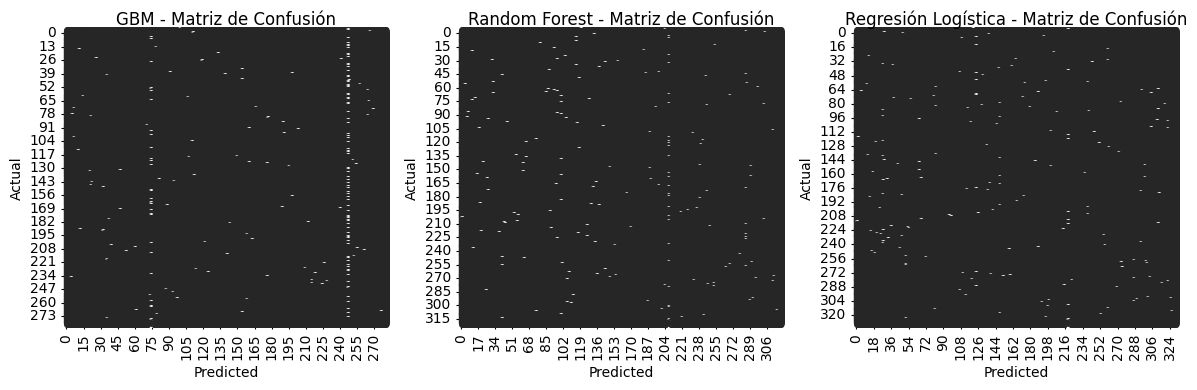

In [24]:
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_gbm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("GBM - Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 2)
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Random Forest - Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 3, 3)
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Regresión Logística - Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()